In [36]:
import pandas as pd
import numpy as np  


Explore the metadata file

In [37]:
metadata = pd.read_csv("../Data/metadata.csv")

metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sample_id          1494 non-null   object
 1   split              1494 non-null   object
 2   instrument_type    1494 non-null   object
 3   features_path      1494 non-null   object
 4   features_md5_hash  1494 non-null   object
dtypes: object(5)
memory usage: 58.5+ KB


In [38]:
metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
0,S0000,train,commercial,train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
1,S0001,train,commercial,train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
2,S0002,train,commercial,train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
3,S0003,train,commercial,train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
4,S0004,train,commercial,train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


We complete the paths in the "features_path" column so that we can read the corresponding csv files more easily.

In [39]:
def replace_value (x):
    return x.replace(" ","")

new_path = "../Data/"

def fix_path(incomplete_path):
    return new_path + incomplete_path

metadata.features_path = metadata['features_path'].apply(replace_value)
metadata.features_path = metadata['features_path'].apply(fix_path)

metadata.head()

,sample_id,split,instrument_type,features_path,features_md5_hash
0,S0000,train,commercial,../Data/train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
1,S0001,train,commercial,../Data/train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
2,S0002,train,commercial,../Data/train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
3,S0003,train,commercial,../Data/train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
4,S0004,train,commercial,../Data/train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78


Now store the various paths to csv folders into dictionaries, depending on whether the samples are in the train, val or test set. We do not have access to any test_files, so those can probably be disregarded.

In [40]:
train_files = metadata[metadata.split == "train"]["features_path"].to_dict()
val_files = metadata[metadata.split == 'val']["features_path"].to_dict()
test_files = metadata[metadata.split == 'test']["features_path"].to_dict()

# creates a dictionary that contains a path for each sample

Check what proportion of samples in the metadata file are associated with commercial vs SAM instruments

In [41]:
metadata.instrument_type.value_counts(normalize=True)

instrument_type
commercial    1.0
Name: proportion, dtype: float64

Turns out they are all commercial. Now examine the train_labels.csv file

In [42]:
train_labels = pd.read_csv("../Data/train_labels.csv",index_col="sample_id")

train_labels.head()

,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
sample_id,,,,,,,,,,
S0000,0,0,0,0,0,0,0,0,1,0
S0001,0,1,0,0,0,0,0,0,0,0
S0002,0,0,0,0,0,1,0,0,0,0
S0003,0,1,0,1,0,0,0,0,1,0
S0004,0,0,0,1,0,1,1,0,0,0


We can see what proportion of the labels contains each ion

In [43]:
for column_name in train_labels.columns:
    print(train_labels[column_name].value_counts(normalize=True))

basalt
0    0.87931
1    0.12069
Name: proportion, dtype: float64
carbonate
0    0.871353
1    0.128647
Name: proportion, dtype: float64
chloride
0    0.876658
1    0.123342
Name: proportion, dtype: float64
iron_oxide
0    0.775862
1    0.224138
Name: proportion, dtype: float64
oxalate
0    0.960212
1    0.039788
Name: proportion, dtype: float64
oxychlorine
0    0.762599
1    0.237401
Name: proportion, dtype: float64
phyllosilicate
0    0.679045
1    0.320955
Name: proportion, dtype: float64
silicate
0    0.862069
1    0.137931
Name: proportion, dtype: float64
sulfate
0    0.803714
1    0.196286
Name: proportion, dtype: float64
sulfide
0    0.952255
1    0.047745
Name: proportion, dtype: float64


Print the ions in descending order of frequency:

In [44]:
sums_normalized = train_labels.aggregate("sum").sort_values(ascending = False)

print(sums_normalized.index.values)


['phyllosilicate' 'oxychlorine' 'iron_oxide' 'sulfate' 'silicate'
 'carbonate' 'chloride' 'basalt' 'sulfide' 'oxalate']


Now put them in a bar plot

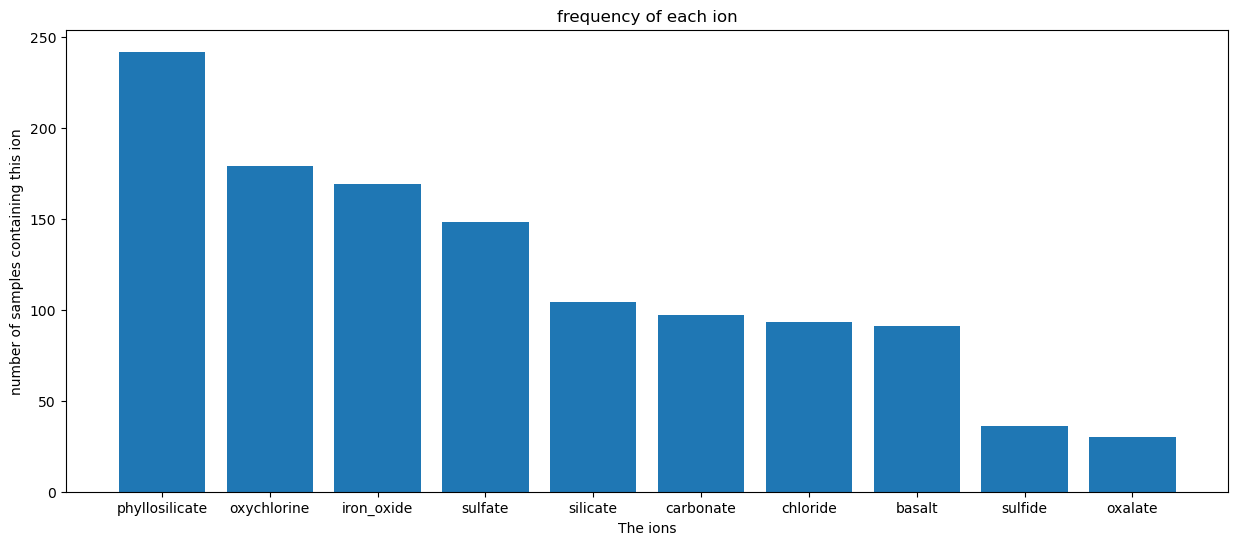

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.bar( sums_normalized.index.values, sums_normalized.values)

plt.title('frequency of each ion')

plt.xlabel("The ions")

plt.ylabel("number of samples containing this ion")

plt.show()



In [46]:
metadata[metadata.split !='test'].sample(5,random_state=2)

,sample_id,split,instrument_type,features_path,features_md5_hash
67,S0067,train,commercial,../Data/train_features/S0067.csv,c8215ab6ba09a5eee7c343ee6d02434b
673,S0673,train,commercial,../Data/train_features/S0673.csv,496284f5529f5ed04c70548c26fdb439
540,S0540,train,commercial,../Data/train_features/S0540.csv,555c7724e8c0ccf24da767625bd8d194
158,S0158,train,commercial,../Data/train_features/S0158.csv,0ebca04338e55e120e2588941526c8f5
451,S0451,train,commercial,../Data/train_features/S0451.csv,b0a0854cbc51d8a72a6138b2c9a1e969


Create a dictionary containing num_samples entries, with each entry being a dataframe corresponding to a sample. The sample identifier is used as the corresponding key. The samples are chosen at random from all of the samples except the "test" ones, to which we have no access. 

In [47]:
num_samples = 5

Dict = {}

metadata_slice = metadata[metadata.split !='test'].sample(num_samples)

for i, sample in enumerate(metadata_slice.sample_id):

    Dict[sample] = pd.read_csv( metadata_slice['features_path'].iloc[i])

Test this: choose the second entry in the dictionary.

In [48]:
Dict[metadata_slice.sample_id.iloc[2]]

,time,temp,m/z,abundance
0,0.000,30.067,0.0,4.399083e-09
1,0.000,30.067,1.0,6.863912e-09
2,0.000,30.067,2.0,2.731615e-09
3,0.000,30.067,3.0,4.684859e-09
4,0.000,30.067,4.0,3.531495e-07
...,...,...,...,...
31895,1660.024,999.009,95.0,2.298128e-13
31896,1660.024,999.009,96.0,1.670802e-13
31897,1660.024,999.009,97.0,1.842128e-13
31898,1660.024,999.009,98.0,2.166731e-13


For the samples in our dictionary we plot temperature as a function of time.

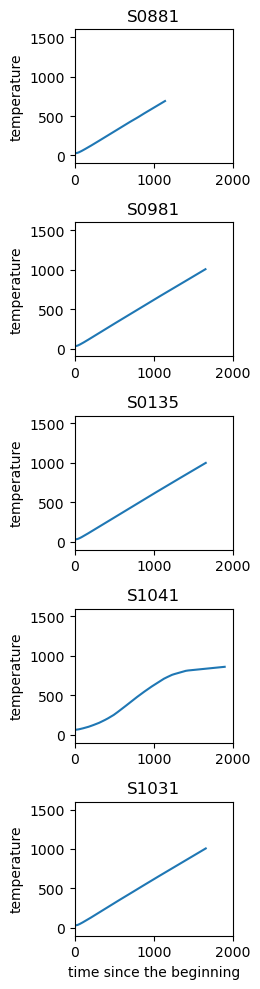

In [49]:

# Create a figure and an array of subplots indexed using ax

fig, ax = plt.subplots(num_samples,sharey = True,height_ratios=0.4*np.ones(num_samples))


for i, sample in enumerate(metadata_slice.sample_id): 

    ax[i].plot(Dict[sample].time,Dict[sample].temp)
    
    ax[i].set(xlim = (-1,2000),ylim = (-100,1600))

    ax[i].set_aspect('equal','box')
    
    plt.xlabel('time since the beginning')
    
    ax[i].set_ylabel('temperature')
    
    ax[i].set_title(sample)



fig.set_size_inches(14,10)



fig.tight_layout()

plt.show()



One can see the plots corresponding to various samples by running all cells above.

In [50]:
Dict.keys()

dict_keys(['S0881', 'S0981', 'S0135', 'S1041', 'S1031'])

Now we plot the various ions grouped by m/z, on a logarithmic scale.

/var/folders/sb/bm5l_dgs6vg61tdy4phf0vcm0000gn/T/ipykernel_15627/1202178137.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


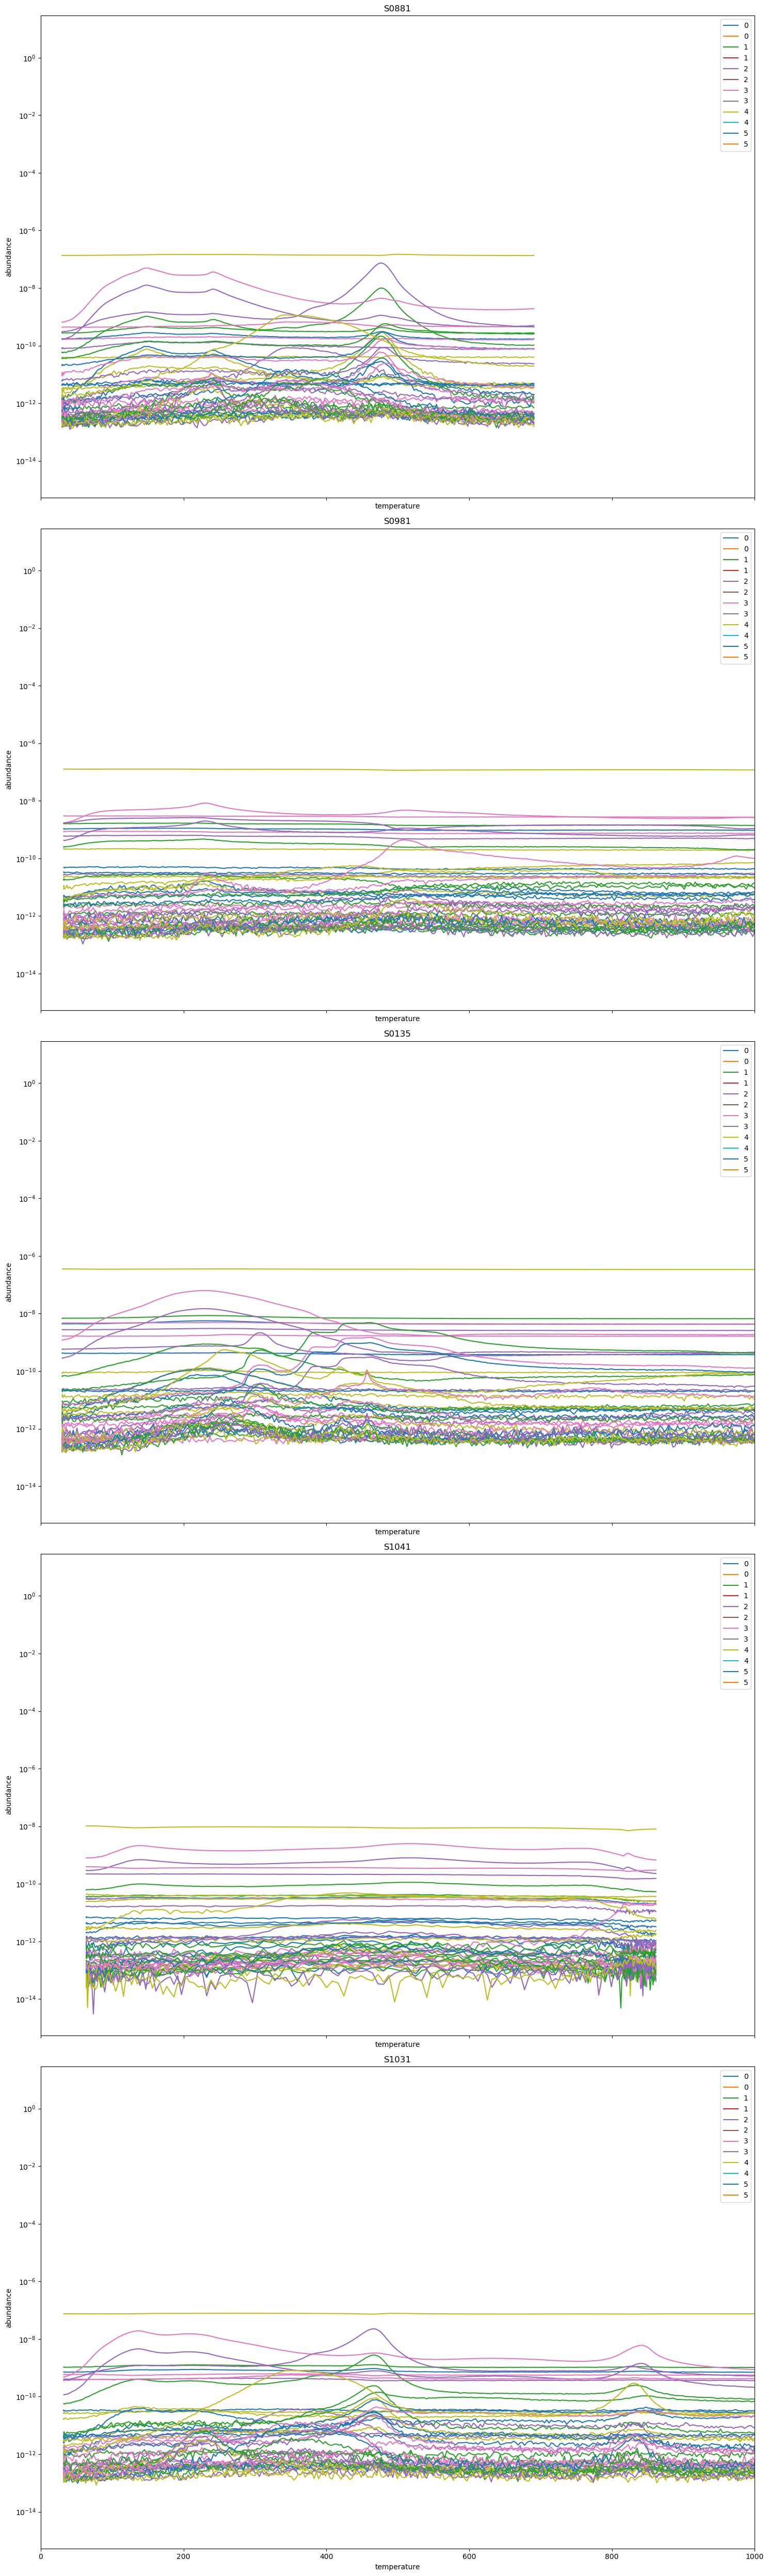

In [51]:
fig, ax = plt.subplots(num_samples,1,sharex = True,sharey = True,figsize = (15,50))


for i, sample in enumerate(metadata_slice.sample_id):

    Dict[sample] = pd.read_csv(metadata_slice.features_path.iloc[i])

    plt.subplot(num_samples,1,i+1)

    

    for mz in range(0,50):
        X = Dict[sample][Dict[sample]['m/z'] == mz].temp
        y = Dict[sample][Dict[sample]['m/z'] == mz].abundance

        # We show a legend only for the first few values of mz in order to not clutter the picture
             
        if mz<=5:
            plt.plot(X,y,i+1,label = str(mz))
        else:
            plt.plot(X,y,i+1,label = "")

        
        

        plt.xlabel('temperature')
        plt.ylabel('abundance')
        plt.xlim(0,1000)
        
        # ax[i] = plt.show()
    
    plt.legend()

    # Each value of m/ appears twice in the legend but I am not sure why
    
    plt.yscale('log')
    plt.title(sample)
    



fig.tight_layout()     
    
fig.show()






We do the data cleaning suggested by the post. Note that the part about removing non-integer values of m/z is probably not relevant to us, it seems that it only applies to SAM samples, which we do not have access to.

In [52]:

def drop_non_int_and_He(df):
    df2 = df
    df2 = df2[df2['m/z'].transform(round) == df2['m/z']]
    df2 = df2[df2['m/z']<100]
    df2 = df2[df2['m/z'] != 4]
    return df2

# Check that indeed some values were dropped

for sample in Dict:

    Dataframe = Dict[sample]

    print ('Before the cleaning there were',len(Dataframe),'entries corresponding to',sample)

    Dataframe_clean = drop_non_int_and_He(Dataframe)

    print ('After the cleaning there are',len(Dataframe_clean),'entries corresponding to',sample)



Before the cleaning there were 22000 entries corresponding to S0881
After the cleaning there are 21780 entries corresponding to S0881
Before the cleaning there were 31900 entries corresponding to S0981
After the cleaning there are 31581 entries corresponding to S0981
Before the cleaning there were 31900 entries corresponding to S0135
After the cleaning there are 31581 entries corresponding to S0135
Before the cleaning there were 37200 entries corresponding to S1041
After the cleaning there are 18414 entries corresponding to S1041
Before the cleaning there were 32000 entries corresponding to S1031
After the cleaning there are 31680 entries corresponding to S1031
